<a href="https://colab.research.google.com/github/2303A52139/AIML_2303a52139/blob/main/LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement simple linear regression on a dataset and plot the regression line

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/hw_200.csv')

print(df.head())



   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


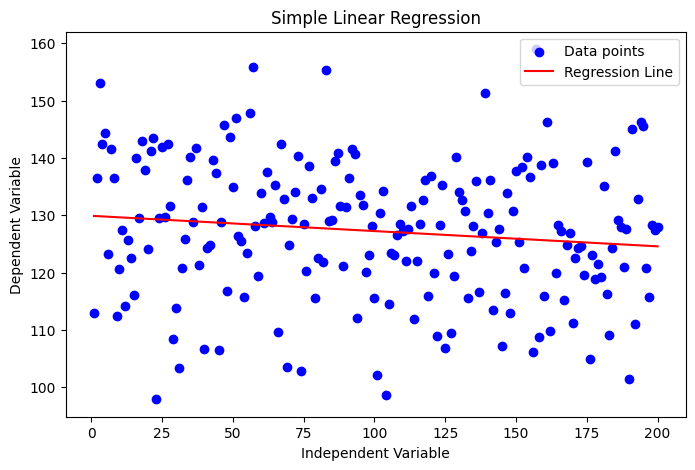

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_simple = df.iloc[:, 0].values.reshape(-1, 1)

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

y_pred_simple = model_simple.predict(X_simple)

plt.figure(figsize=(8, 5))
plt.scatter(X_simple, y, color='blue', label='Data points')
plt.plot(X_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

2. Calculate R-squared value for Simple Linear Regression

In [ ]:
r2_simple = r2_score(y, y_pred_simple)
print(f'R-squared value for Simple Linear Regression: {r2_simple:.4f}')

R-squared value for Simple Linear Regression: 0.0166


3. Multiple Linear Regression with 2-3 independent variable

In [ ]:

X_multiple = df.iloc[:, :-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multiple)

model_multiple = LinearRegression()
model_multiple.fit(X_scaled, y)

y_pred_multiple = model_multiple.predict(X_scaled)

r2_multiple = r2_score(y, y_pred_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)

print(f'R-squared value for Multiple Linear Regression: {r2_multiple:.4f}')
print(f'Mean Squared Error for Multiple Linear Regression: {mse_multiple:.4f}')


R-squared value for Multiple Linear Regression: 0.3160
Mean Squared Error for Multiple Linear Regression: 97.3688


4. Plot the residuals and check for any patterns.

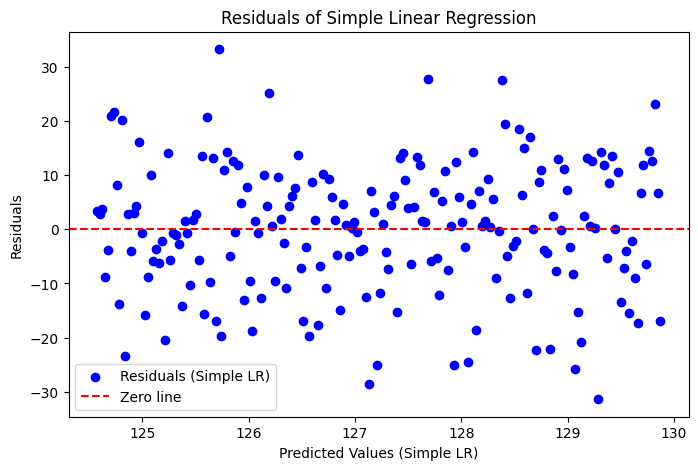

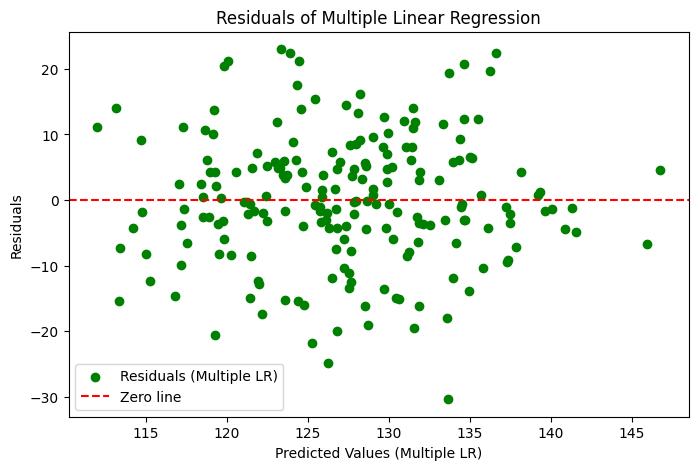

In [ ]:

residuals_simple = y - y_pred_simple

residuals_multiple = y - y_pred_multiple

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_simple, residuals_simple, color='blue', label='Residuals (Simple LR)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero line')
plt.xlabel('Predicted Values (Simple LR)')
plt.ylabel('Residuals')
plt.title('Residuals of Simple Linear Regression')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_multiple, residuals_multiple, color='green', label='Residuals (Multiple LR)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero line')
plt.xlabel('Predicted Values (Multiple LR)')
plt.ylabel('Residuals')
plt.title('Residuals of Multiple Linear Regression')
plt.legend()
plt.show()

5. Compare the performance of Linear Regression with and without feature scaling ---


Performance without feature scaling:
R-squared: 0.1618
Mean Squared Error: 133.6530

Performance with feature scaling:
R-squared: 0.1618
Mean Squared Error: 133.6530


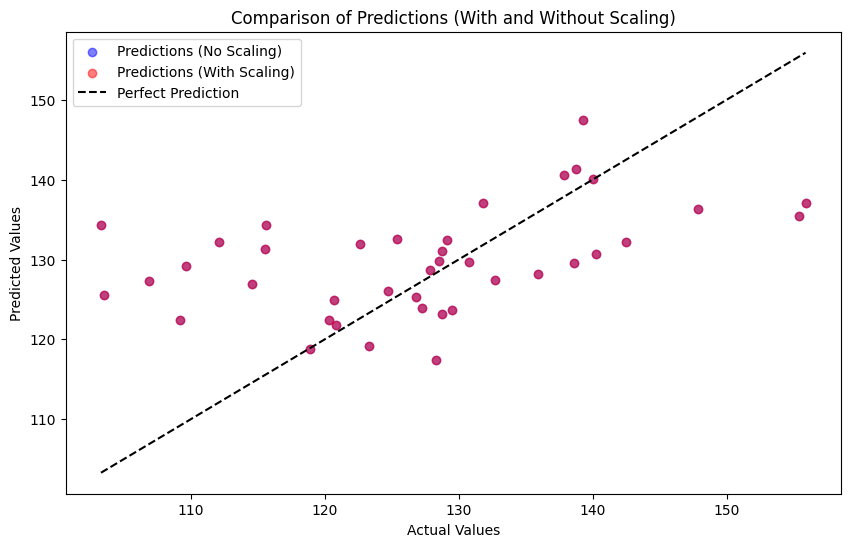

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = model_no_scaling.predict(X_test)

r2_no_scaling = r2_score(y_test, y_pred_no_scaling)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LinearRegression()
model_with_scaling.fit(X_train_scaled, y_train)

y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

r2_with_scaling = r2_score(y_test, y_pred_with_scaling)
mse_with_scaling = mean_squared_error(y_test, y_pred_with_scaling)

print(f'Performance without feature scaling:')
print(f'R-squared: {r2_no_scaling:.4f}')
print(f'Mean Squared Error: {mse_no_scaling:.4f}')

print(f'\nPerformance with feature scaling:')
print(f'R-squared: {r2_with_scaling:.4f}')
print(f'Mean Squared Error: {mse_with_scaling:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_no_scaling, color='blue', label='Predictions (No Scaling)', alpha=0.5)
plt.scatter(y_test, y_pred_with_scaling, color='red', label='Predictions (With Scaling)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions (With and Without Scaling)')
plt.legend()
plt.show()
